In [2]:
import tensorflow as tf

In [3]:
img_w = 128
img_h = 128
img_ch = 3


In [4]:
inputs = tf.keras.layers.Input((img_w,img_h,img_ch))

s = tf.keras.layers.Lambda(lambda x: x/255)(inputs)
c1 = tf.keras.layers.Conv2D(16,(3,3),activation='relu', kernel_initializer='he_normal', padding='same')(s)
c1 = tf.keras.layers.Dropout(0.1)(c1)
c1 = tf.keras.layers.Conv2D(16,(3,3),activation='relu', kernel_initializer='he_normal', padding='same')(c1)
p1 = tf.keras.layers.MaxPool2D((2,2))(c1)

c2 = tf.keras.layers.Conv2D(32, (3,3), activation='relu',kernel_initializer='he_normal', padding='same')(p1)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(32,(3,3),activation='relu', kernel_initializer='he_normal', padding='same')(c2)
p2 = tf.keras.layers.MaxPool2D((2,2))(c2)
 
c3 = tf.keras.layers.Conv2D(64, (3,3), activation='relu',kernel_initializer='he_normal', padding='same')(p2)
c3 = tf.keras.layers.Dropout(0.1)(c3)
c3 = tf.keras.layers.Conv2D(64,(3,3),activation='relu', kernel_initializer='he_normal', padding='same')(c3)
p3 = tf.keras.layers.MaxPool2D((2,2))(c3)

c4 = tf.keras.layers.Conv2D(128, (3,3), activation='relu',kernel_initializer='he_normal', padding='same')(p3)
c4 = tf.keras.layers.Dropout(0.1)(c4)
c4 = tf.keras.layers.Conv2D(128,(3,3),activation='relu', kernel_initializer='he_normal', padding='same')(c4)
p4 = tf.keras.layers.MaxPool2D((2,2))(c4)


c5 = tf.keras.layers.Conv2D(256, (3,3), activation='relu',kernel_initializer='he_normal', padding='same')(p4)
c5 = tf.keras.layers.Dropout(0.1)(c5)
c5 = tf.keras.layers.Conv2D(256,(3,3),activation='relu', kernel_initializer='he_normal', padding='same')(c5)
# p5 = tf.keras.layers.MaxPool2D((2,2))(c5)


# Expansive path

u6 = tf.keras.layers.Conv2DTranspose(128,(2,2), strides=(2,2),padding='same')(c5)
u6 = tf.keras.layers.concatenate([u6,c4])
c6 = tf.keras.layers.Conv2D(128,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(u6)
c6 = tf.keras.layers.Dropout(0.2)(c6)
c6 = tf.keras.layers.Conv2D(128,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(c6)


u7 = tf.keras.layers.Conv2DTranspose(128,(2,2), strides=(2,2),padding='same')(c6)
u7 = tf.keras.layers.concatenate([u7,c3])
c7 = tf.keras.layers.Conv2D(64,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(u7)
c7 = tf.keras.layers.Dropout(0.2)(c7)
c7 = tf.keras.layers.Conv2D(64,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(c7)


u8 = tf.keras.layers.Conv2DTranspose(128,(2,2), strides=(2,2),padding='same')(c7)
u8 = tf.keras.layers.concatenate([u8,c2])
c8 = tf.keras.layers.Conv2D(32,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(u8)
c8 = tf.keras.layers.Dropout(0.2)(c8)
c8 = tf.keras.layers.Conv2D(32,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(c8)

u9 = tf.keras.layers.Conv2DTranspose(128,(2,2), strides=(2,2),padding='same')(c8)
u9 = tf.keras.layers.concatenate([u9,c1])
c9 = tf.keras.layers.Conv2D(16,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(u9)
c9 = tf.keras.layers.Dropout(0.2)(c9)
c9 = tf.keras.layers.Conv2D(16,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(c9)


outputs = tf.keras.layers.Conv2D(1,(1,1),activation='sigmoid')(c9)

model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda (Lambda)     │ (None, 128, 128,  │          0 │ input_layer[0][0] │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 128, 128,  │        448 │ lambda[0][0]      │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 128, 128,  │          0 │ conv2d[0][0]      │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 128, 128,  │      2,320 │ dropout[0][0]     │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 64, 64,    │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 64, 64,    │      4,640 │ max_pooling2d[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 64, 64,    │          0 │ conv2d_2[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 64, 64,    │      9,248 │ dropout_1[0][0]   │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 32, 32,    │          0 │ conv2d_3[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 32, 32,    │     18,496 │ max_pooling2d_1[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 32, 32,    │          0 │ conv2d_4[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 32, 32,    │     36,928 │ dropout_2[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 16, 16,    │          0 │ conv2d_5[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 16, 16,    │     73,856 │ max_pooling2d_2[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 16, 16,    │          0 │ conv2d_6[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 16, 16,    │    147,584 │ dropout_3[0][0] 

 Total params: 2,093,697 (7.99 MB)

 Trainable params: 2,093,697 (7.99 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# preparing train imgs

import os
import numpy as np
import tqdm
import random
from skimage.io import imread, imshow
from skimage.transform import resize
import matplotlib.pyplot as plt

TRAIN_PTH = '/Users/khalidalharbi/Desktop/ws/T/data-science-bowl-2018/stage1_train/'
TEST_PTH = '/Users/khalidalharbi/Desktop/ws/T/data-science-bowl-2018/stage1_test/'

train_ids = next(os.walk(TRAIN_PTH))[1]
test_ids = next(os.walk(TEST_PTH))[1]

X_train = np.zeros((len(train_ids), img_h,img_w,img_ch), dtype=np.uint8)
Y_train = np.zeros((len(train_ids), img_h,img_w,1), dtype=bool)

print("Resize training imgs and masks")
for n,id_ in tqdm.tqdm(enumerate(train_ids),total=len(train_ids)):
    path = TRAIN_PTH + id_
    img = imread(path + '/images/' + id_ + '.png')[:,:,:img_ch]
    img = resize(img, (img_h,img_w), mode='constant', preserve_range=True)
    X_train[n] = img
    mask = np.zeros((img_h,img_w,1), dtype=bool)
    for mask_file in next(os.walk(path + '/masks/'))[2]:
        mask_ = imread(path + '/masks/' + mask_file)
        mask_ = np.expand_dims(resize(mask_, (img_h,img_w), mode='constant',
                                      preserve_range=True), axis=-1)
        mask = np.maximum(mask, mask_)
    Y_train[n] = mask

Resize training imgs and masks


100%|██████████| 670/670 [02:26<00:00,  4.59it/s]


In [19]:
# prepare test imgs

X_test = np.zeros((len(test_ids), img_h,img_w, img_ch), dtype=np.uint8)

sizes_test = []

print('Resizing test images')
for n, id_ in tqdm.tqdm(enumerate(test_ids), total=len(test_ids)):
    path = TEST_PTH + id_
    img = imread(path + '/images/' + id_ + '.png')[:,:,:img_ch]
    sizes_test.append([img.shape[0], img.shape[1]])
    img = resize(img, (img_h,img_w), mode='constant', preserve_range=True)
    X_test[n] = img
print('done')

Resizing test images


100%|██████████| 65/65 [00:01<00:00, 64.90it/s]

done


340


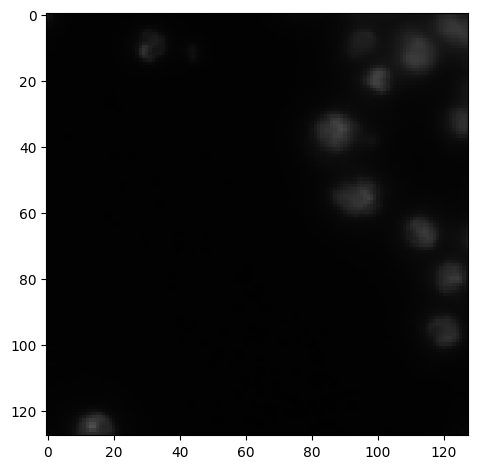

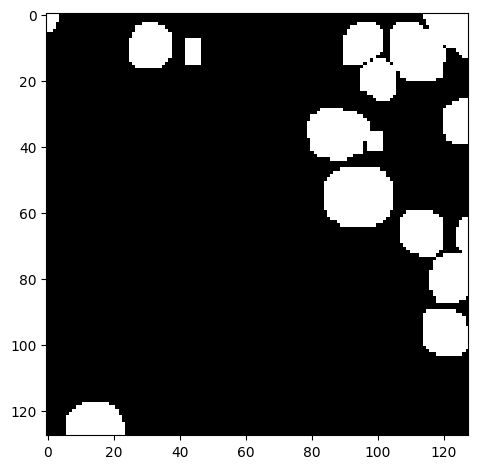

In [59]:
# img_x = random.randint(0, len(train_ids))
# print(img_x)
# imshow(X_train[0])
# plt.show()
# imshow(np.squeeze(Y_train[0]))
# plt.show()

In [51]:
# callbacks and checkpoints

ckpt = tf.keras.callbacks.ModelCheckpoint('unet.h5.keras', verbose=1, save_best_only=True)
callbck = [tf.keras.callbacks.EarlyStopping(patience=2, monitor='val_loss'),
           tf.keras.callbacks.TensorBoard(log_dir='logs')]

results = model.fit(X_train,Y_train, validation_split=0.1, epochs=25, batch_size=16, callbacks=callbck)



Epoch 1/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.6962 - loss: 0.6447 - val_accuracy: 0.7683 - val_loss: 0.4156
Epoch 2/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.7772 - loss: 0.3755 - val_accuracy: 0.9176 - val_loss: 0.1901
Epoch 3/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.9240 - loss: 0.1870 - val_accuracy: 0.9342 - val_loss: 0.1590
Epoch 4/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.9376 - loss: 0.1600 - val_accuracy: 0.9503 - val_loss: 0.1265
Epoch 5/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - accuracy: 0.9496 - loss: 0.1308 - val_accuracy: 0.9525 - val_loss: 0.1208
Epoch 6/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.9529 - loss: 0.1255 - val_accuracy: 0.9541 - val_loss: 0.1199
Epoch 7/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.9530 - loss: 0.1275 - val_accuracy: 0.9550 - val_loss: 0.1145
Epoch 8/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - accuracy: 0.9586 - loss: 0.1092 - val_accuracy: 0.9546 - val_loss: